# Multiple Linear Regression

In [54]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns



In [98]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [56]:
dataset = fetch_california_housing()

In [57]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [58]:
dataset['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [59]:
dataset['target_names']

['MedHouseVal']

In [60]:
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
df['Price'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [63]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


<Figure size 800x550 with 0 Axes>

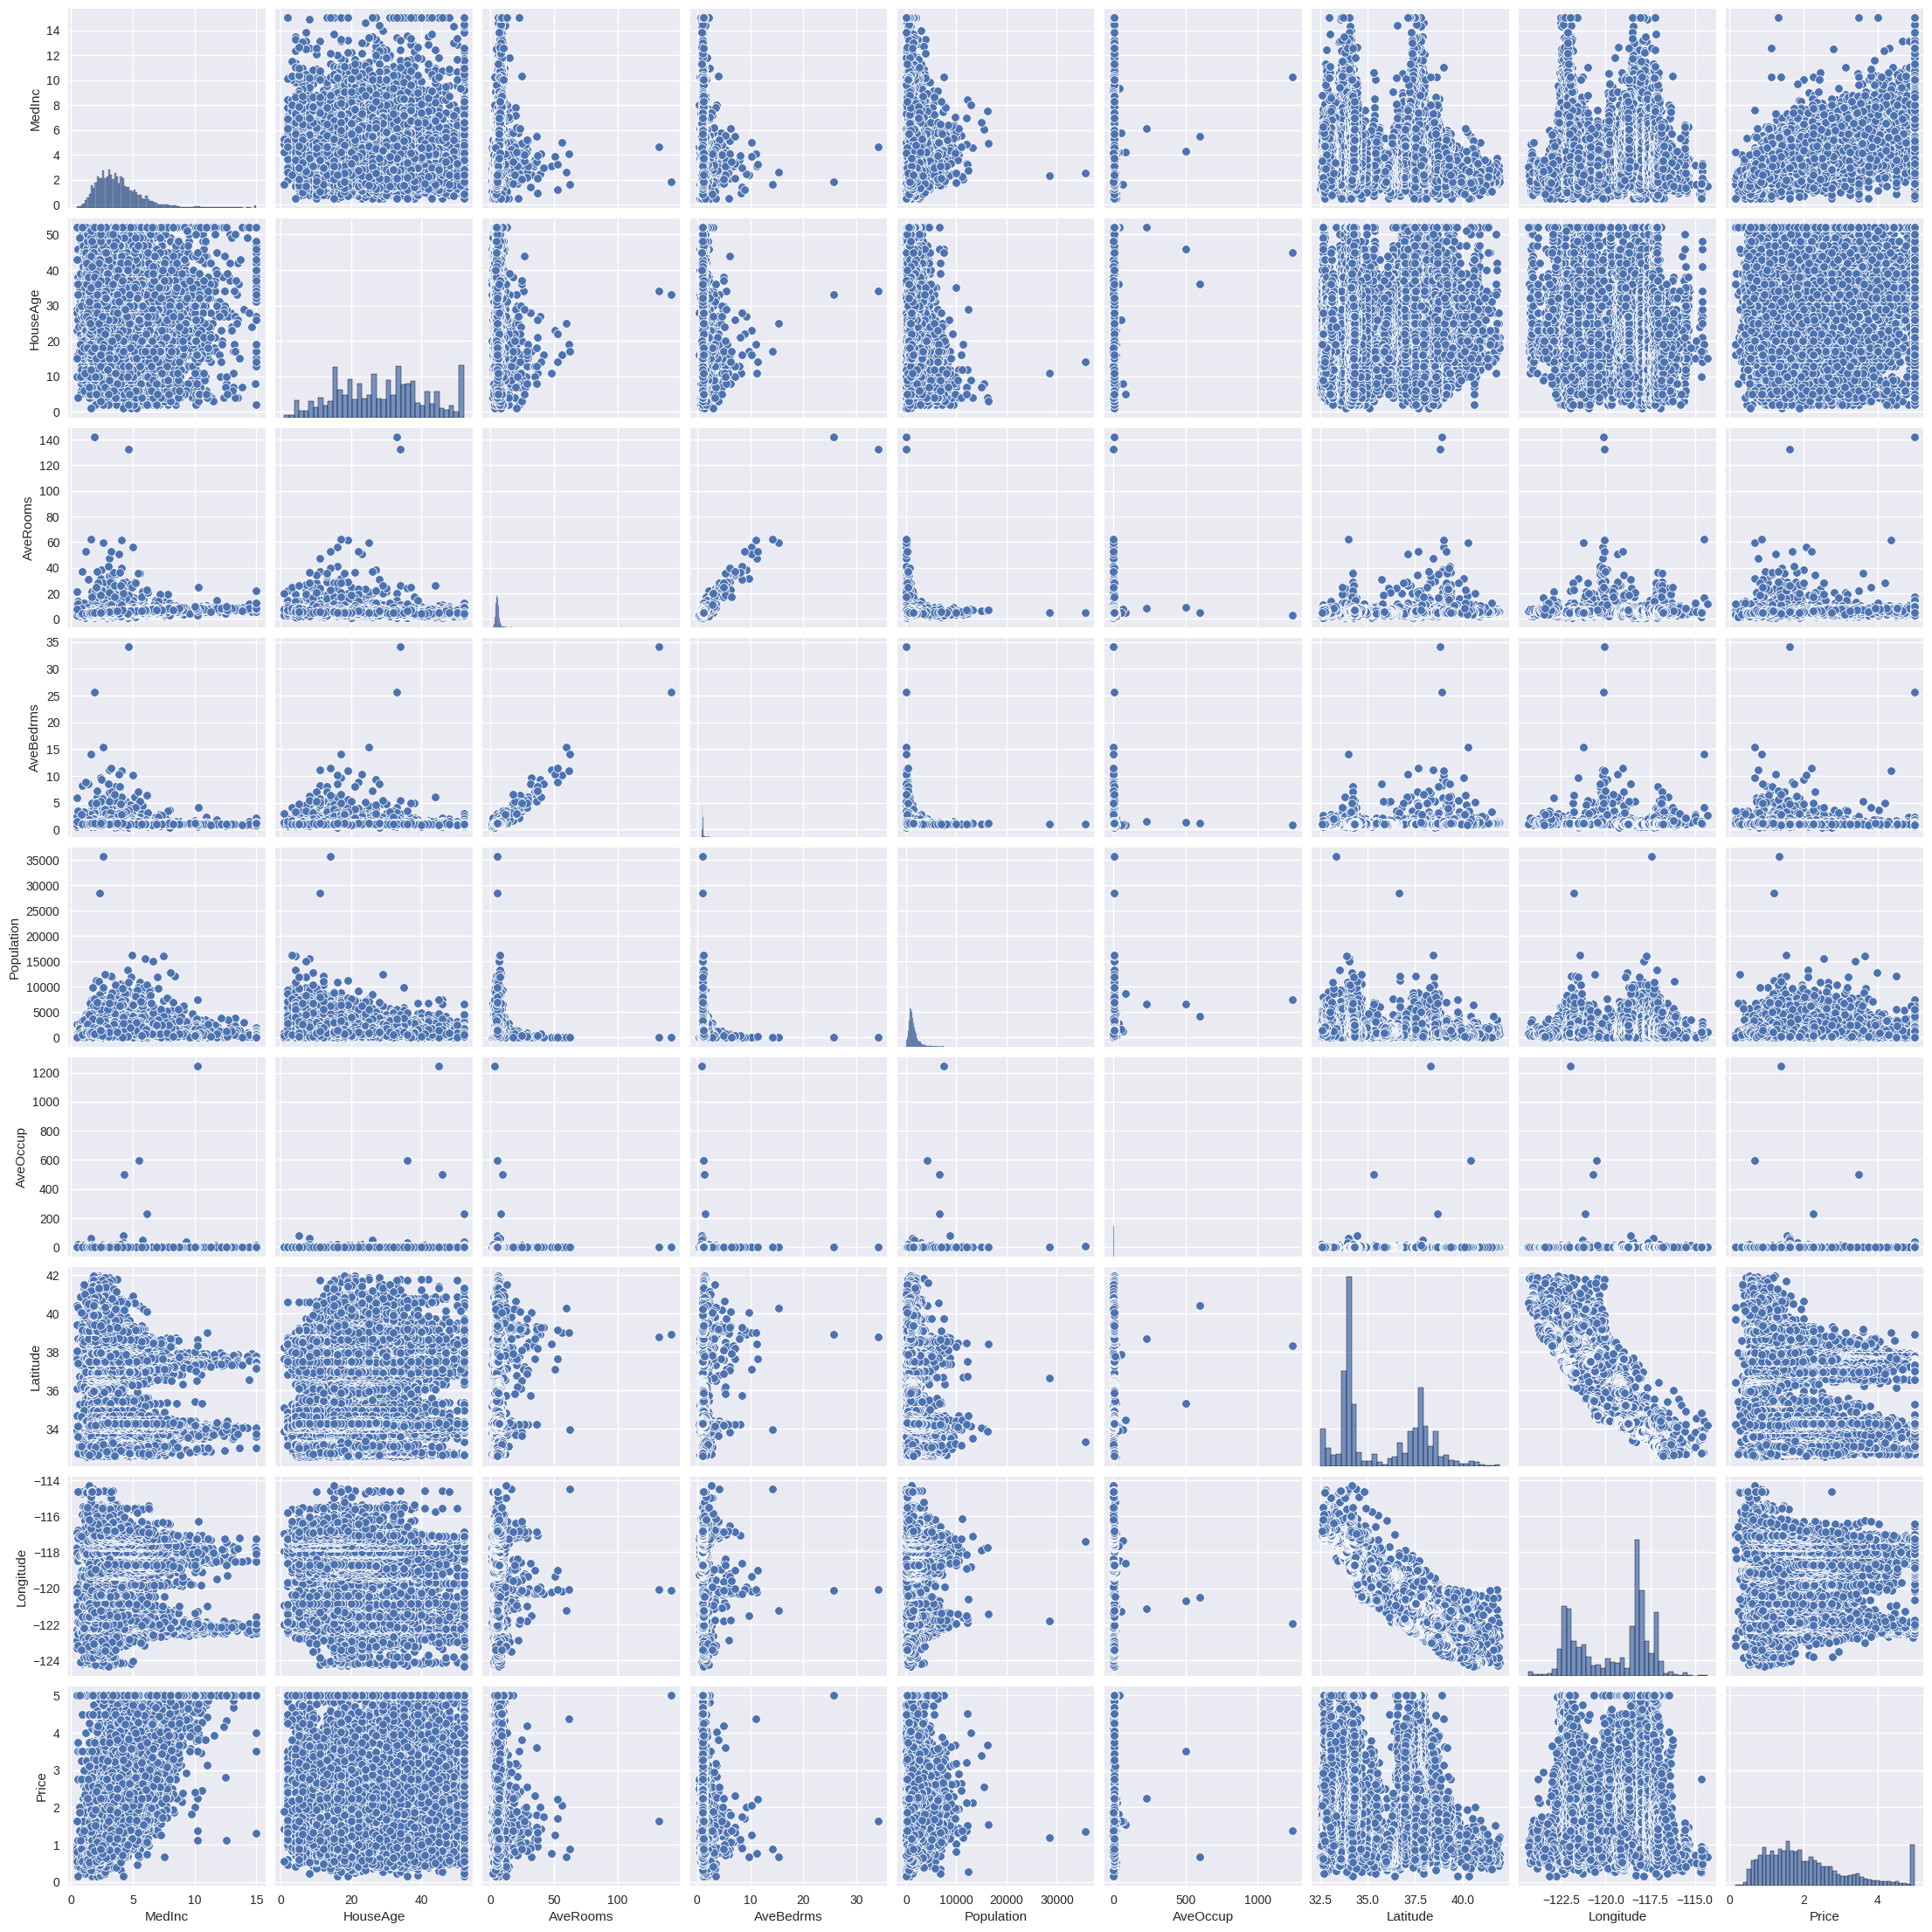

In [93]:
plt.clf() 
sns.pairplot(df)
plt.show()

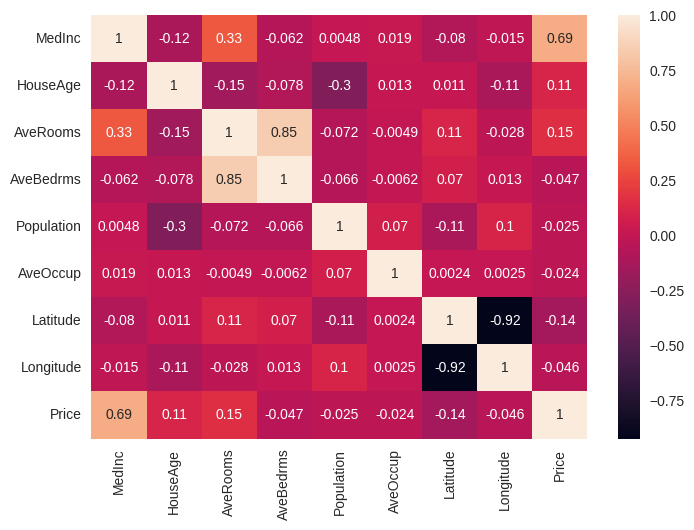

In [94]:
plt.clf() 
sns.heatmap(df.corr(), annot=True)
plt.show()

In [67]:
## Independent and dependant features
x= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=10)

In [70]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [73]:
x_train

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [74]:
x_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

## Model Training

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
regressor = LinearRegression()
regressor

LinearRegression()

In [77]:
regressor.fit(x_train,y_train)

LinearRegression()

In [78]:
#Slope or coefficients
regressor.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [79]:
# Intercepts
regressor.intercept_

2.0634768086491184

In [80]:
#Prediction for test data
y_pred = regressor.predict(x_test)

In [81]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

## Performance Metrics

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5522332399363619
0.537105694300796
0.7431239734636219


In [83]:
# R2 Score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.593595852643664


In [84]:
# Adjusted R2 score
1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

0.5931179409607519

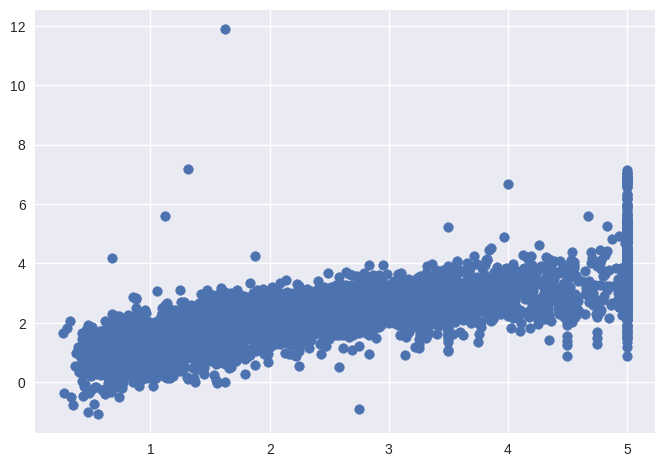

In [99]:
## asumptions
plt.clf() 
plt.scatter(y_test,y_pred)
plt.show()

In [100]:
# Residuals
residuals = y_test-y_pred

In [101]:
residuals

20303   -1.329975
16966    0.960885
10623   -0.746908
6146    -0.307462
2208    -0.662167
           ...   
13490   -0.243475
9340     0.507182
17439   -1.366037
2602     0.046480
7180    -0.627770
Name: Price, Length: 6812, dtype: float64

<Figure size 800x550 with 0 Axes>

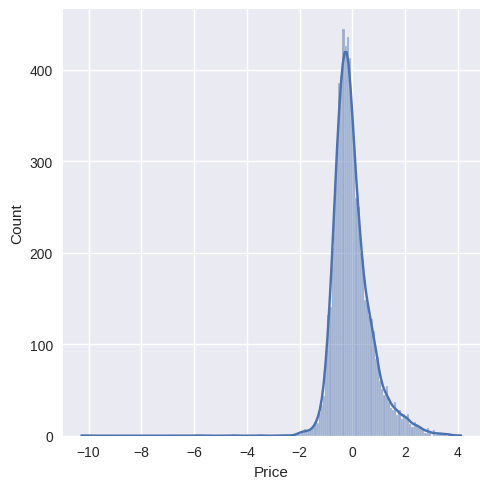

In [105]:
plt.clf() 
sns.displot(residuals, kde= True)
plt.show()

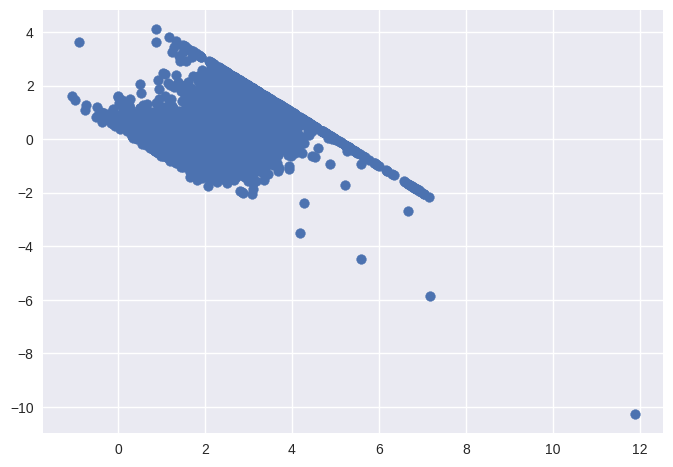

In [107]:
plt.clf() 
plt.scatter(y_pred,residuals)
plt.show()

 🥒 What is Pickling in Python?

**Pickling** is the process of **serializing and deserializing** Python objects.

- **Pickling** = Converting a Python object into a byte stream (so it can be saved or transmitted).
- **Unpickling** = Reconstructing the Python object from the byte stream.



## 🧠 Why the Name "Pickling"?

It’s a metaphor! You’re “preserving” Python objects so you can “unpickle” (recover) them later—just like pickled food.



## ✅ Common Use Cases

- Saving trained **machine learning models**.
- Caching processed data or **intermediate results**.
- Serializing custom **Python objects** or **data structures**.
- **Transmitting objects** between Python processes or systems.


In [108]:
import pickle


In [110]:
pickle.dump(regressor,open('regressor.pkl','wb'))

In [111]:
model = pickle.load(open('regressor.pkl','rb'))

In [112]:
model.predict(x_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])